In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
# Reading the csv file into the pandas dataframe
df1 = pd.read_csv("/Users/sabih/Documents/DATA SCIENCE AND MACHINE LEARNING/Rel estate predictions/Dataset/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
# First examining the area_type feature
# Printing the count of data sample in each of these area_type categories
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
# counting availibility
avail = df1.groupby('availability')['availability'].agg('count')
print(avail)
avail.shape

availability
14-Jul                      1
14-Nov                      1
15-Aug                      1
15-Dec                      1
15-Jun                      1
                        ...  
22-Mar                      3
22-May                     10
22-Nov                      2
Immediate Possession       16
Ready To Move           10581
Name: availability, Length: 81, dtype: int64


(81,)

In [6]:
# Dropping a few columns that i will not be using for the price prediction
# Just to get myself some clarity and focus on needed parameters
df2 = df1.drop(['area_type','society','balcony','availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
# Now just to be sure, removing the NA values if any
# Basically doing data cleaning
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
# Since the the values are very less as compared to number of rows working on
# I'll just use the dropna function to do so
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
# Noticeable point here is that many values are similar but with different names
# e.g. 4 Bedroom and 4 BHK is essentially the same
# So tackling that

# So creating a new column with this thing tackled
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
# To get number of bhk's
df3.groupby('BHK')['BHK'].agg('count')

BHK
1      649
2     5527
3     4832
4     1395
5      353
6      221
7      100
8       89
9       54
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: BHK, dtype: int64

In [14]:
# 43 bedrooms??? Which home is this??
df3[df3.BHK == 43]

,location,size,total_sqft,bath,price,BHK
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# Gonna need to remove the ranges and just keep numbers
def find_average_and_convert_to_float(x):
    val = x.split("-")
    print(val)
    if len(val) > 1:
        avg = (float(val[0])+float(val[1]))/2
        print(avg)
        return avg
    else:
        str_val = ''
        for char in val[0]:
#             print(char, char.isalpha())
            if char.isalpha():
                break
            else:
                str_val += char
        print(str_val)
        
        return float(str_val)

In [17]:
df3['total_sqft'] = df3['total_sqft'].apply(find_average_and_convert_to_float)

['1056']
1056
['2600']
2600
['1440']
1440
['1521']
1521
['1200']
1200
['1170']
1170
['2732']
2732
['3300']
3300
['1310']
1310
['1020']
1020
['1800']
1800
['2785']
2785
['1000']
1000
['1100']
1100
['2250']
2250
['1175']
1175
['1180']
1180
['1540']
1540
['2770']
2770
['1100']
1100
['600']
600
['1755']
1755
['2800']
2800
['1767']
1767
['510']
510
['1250']
1250
['660']
660
['1610']
1610
['1151']
1151
['1025']
1025
['2100 ', ' 2850']
2475.0
['1075']
1075
['1760']
1760
['1693']
1693
['1925']
1925
['700']
700
['1070']
1070
['1724']
1724
['1290']
1290
['1143']
1143
['1296']
1296
['1254']
1254
['600']
600
['660']
660
['1330.74']
1330.74
['600']
600
['970']
970
['1459']
1459
['800']
800
['869']
869
['1270']
1270
['1670']
1670
['2010']
2010
['1185']
1185
['1600']
1600
['1200']
1200
['1500']
1500
['1407']
1407
['840']
840
['4395']
4395
['845']
845
['5700']
5700
['1160']
1160
['3000']
3000
['1100']
1100
['1140']
1140
['1220']
1220
['1350']
1350
['1005']
1005
['500']
500
['1358']
1358
['1569']
1569


['1515']
1515
['2118']
2118
['1380']
1380
['1083']
1083
['600']
600
['2300']
2300
['1240']
1240
['1750']
1750
['1230']
1230
['1500']
1500
['985']
985
['1500']
1500
['1125']
1125
['950']
950
['1580']
1580
['1092']
1092
['1090']
1090
['2264']
2264
['1033']
1033
['810']
810
['1045']
1045
['1337']
1337
['1200']
1200
['1580']
1580
['1500']
1500
['1640']
1640
['1570']
1570
['1470']
1470
['1160']
1160
['1050']
1050
['1855']
1855
['1460']
1460
['1823']
1823
['1094']
1094
['1153']
1153
['1325']
1325
['1200']
1200
['1590']
1590
['1210']
1210
['1200']
1200
['1202']
1202
['1202']
1202
['1200']
1200
['1688']
1688
['1020']
1020
['1185']
1185
['1235']
1235
['3205']
3205
['1077']
1077
['1415']
1415
['2330']
2330
['805']
805
['425']
425
['1155']
1155
['5270']
5270
['656']
656
['1100']
1100
['1150']
1150
['600']
600
['1468']
1468
['4300']
4300
['2280']
2280
['1341']
1341
['1279']
1279
['2225']
2225
['1185']
1185
['1750']
1750
['1152']
1152
['1000']
1000
['1300']
1300
['2760']
2760
['1070']
1070
['1101']

['4000 ', ' 5249']
4624.5
['1410']
1410
['1090']
1090
['540']
540
['1300']
1300
['1890']
1890
['1254']
1254
['2800']
2800
['1275']
1275
['1245']
1245
['1170']
1170
['1193']
1193
['850']
850
['1678']
1678
['1600']
1600
['1750']
1750
['1125']
1125
['2200']
2200
['1500Sq. Meter']
1500
['2800']
2800
['1200']
1200
['1000']
1000
['2780']
2780
['1320']
1320
['8000']
8000
['2422']
2422
['1100']
1100
['882']
882
['845']
845
['883']
883
['1595']
1595
['1280']
1280
['1700']
1700
['920']
920
['1300']
1300
['1450']
1450
['1757']
1757
['600']
600
['2400']
2400
['1240']
1240
['750']
750
['1330']
1330
['1062']
1062
['1078']
1078
['1460']
1460
['1200']
1200
['1200']
1200
['912']
912
['142.61Sq. Meter']
142.61
['2400']
2400
['2028']
2028
['980']
980
['1000']
1000
['1050']
1050
['2611']
2611
['1875']
1875
['1065']
1065
['1800']
1800
['1163']
1163
['1098']
1098
['1725']
1725
['4000']
4000
['1128']
1128
['1320']
1320
['1705']
1705
['1418']
1418
['1500']
1500
['1100']
1100
['1464']
1464
['812']
812
['1280']

['1040']
1040
['900']
900
['1030']
1030
['2556']
2556
['1850']
1850
['750']
750
['1028']
1028
['1270']
1270
['1655']
1655
['940']
940
['1050']
1050
['600']
600
['946']
946
['1726']
1726
['2121']
2121
['1404']
1404
['1525']
1525
['1025']
1025
['1575']
1575
['860']
860
['1223']
1223
['3750']
3750
['1197']
1197
['1150']
1150
['4800']
4800
['1040']
1040
['1310']
1310
['1788']
1788
['1144']
1144
['1070']
1070
['1200']
1200
['1862']
1862
['1200']
1200
['970']
970
['1646']
1646
['4395']
4395
['1200']
1200
['1995']
1995
['2400']
2400
['1085']
1085
['1139']
1139
['1092']
1092
['1767']
1767
['1700']
1700
['1692']
1692
['1645']
1645
['1345']
1345
['1100']
1100
['1408']
1408
['2400']
2400
['1920']
1920
['6040']
6040
['2072']
2072
['1420']
1420
['2040']
2040
['1220']
1220
['1200']
1200
['1300']
1300
['1150']
1150
['1470']
1470
['1063']
1063
['1311']
1311
['3500']
3500
['600']
600
['1400']
1400
['2200']
2200
['1430']
1430
['1060']
1060
['1000']
1000
['1760']
1760
['2010']
2010
['1480']
1480
['1230']

['630']
630
['1243']
1243
['960']
960
['1690']
1690
['735']
735
['1365']
1365
['2849']
2849
['1420']
1420
['1570']
1570
['850']
850
['1575']
1575
['1418']
1418
['1050']
1050
['1065']
1065
['1340']
1340
['1610']
1610
['1160']
1160
['1092']
1092
['1194']
1194
['1455']
1455
['734']
734
['799']
799
['1896']
1896
['1100']
1100
['1350']
1350
['1355']
1355
['1128']
1128
['1350']
1350
['3875']
3875
['1493']
1493
['1098']
1098
['1900']
1900
['1460']
1460
['2350']
2350
['1600']
1600
['1091']
1091
['1180']
1180
['1366']
1366
['1685']
1685
['1260']
1260
['3010']
3010
['1330']
1330
['1200']
1200
['1346']
1346
['630']
630
['1850']
1850
['2350']
2350
['755']
755
['800']
800
['1194']
1194
['3850']
3850
['4235']
4235
['800']
800
['2250']
2250
['1352']
1352
['2002']
2002
['4000']
4000
['1060']
1060
['1419.59']
1419.59
['1196']
1196
['1220']
1220
['1595']
1595
['1260']
1260
['1100']
1100
['1550']
1550
['1180']
1180
['4000']
4000
['1662']
1662
['1285']
1285
['1080']
1080
['1862']
1862
['1419']
1419
['1410

['2170']
2170
['1080']
1080
['1790']
1790
['550']
550
['1270']
1270
['1033']
1033
['1000']
1000
['2940']
2940
['1240']
1240
['1650']
1650
['883']
883
['1500']
1500
['1730']
1730
['1915']
1915
['1545']
1545
['1865']
1865
['1150']
1150
['1200']
1200
['963']
963
['1200']
1200
['2600']
2600
['1700']
1700
['1682']
1682
['1371']
1371
['901']
901
['600']
600
['1730']
1730
['1200']
1200
['1500']
1500
['3785']
3785
['3500']
3500
['1203']
1203
['1357']
1357
['1600']
1600
['350']
350
['1665']
1665
['1400']
1400
['835']
835
['815']
815
['1444']
1444
['1277']
1277
['1521']
1521
['1134']
1134
['995']
995
['2760']
2760
['1325']
1325
['4000']
4000
['1525']
1525
['1320']
1320
['650']
650
['1858']
1858
['1150']
1150
['769']
769
['1571']
1571
['1445']
1445
['1590']
1590
['902']
902
['2238']
2238
['1090']
1090
['1712']
1712
['1088']
1088
['1575']
1575
['2150']
2150
['1920']
1920
['1000']
1000
['1100']
1100
['1089']
1089
['1106']
1106
['927']
927
['1339']
1339
['923']
923
['2900']
2900
['1175']
1175
['975'

1460
['1355']
1355
['833']
833
['1200']
1200
['1750']
1750
['1200']
1200
['669']
669
['2200']
2200
['1594']
1594
['1790']
1790
['1020']
1020
['3250']
3250
['1037']
1037
['1345']
1345
['1070']
1070
['3000']
3000
['1385']
1385
['1207']
1207
['1140']
1140
['1220']
1220
['3811']
3811
['3596']
3596
['1965']
1965
['1760']
1760
['1225']
1225
['1075']
1075
['1000']
1000
['1891']
1891
['1322']
1322
['1095']
1095
['3600']
3600
['1045']
1045
['1545']
1545
['1996']
1996
['1125']
1125
['1560']
1560
['2000']
2000
['3100']
3100
['780']
780
['1350']
1350
['2275']
2275
['1350']
1350
['1464']
1464
['1570']
1570
['708']
708
['1680']
1680
['1400']
1400
['1310']
1310
['3300']
3300
['1175']
1175
['1428']
1428
['750']
750
['3252']
3252
['1194']
1194
['750']
750
['1080']
1080
['1200']
1200
['1200']
1200
['1200']
1200
['1320']
1320
['1842']
1842
['1146']
1146
['440']
440
['1048']
1048
['1801']
1801
['1232']
1232
['1150']
1150
['1868']
1868
['1445']
1445
['1466']
1466
['1730']
1730
['3860']
3860
['1185']
1185
[

1820
['1820']
1820
['1565']
1565
['1334']
1334
['924']
924
['914']
914
['500']
500
['2145']
2145
['1200']
1200
['1650']
1650
['3940']
3940
['1020']
1020
['1180']
1180
['1255']
1255
['2777.29']
2777.29
['1014']
1014
['920']
920
['695']
695
['2273']
2273
['1140']
1140
['3000']
3000
['1180']
1180
['2400']
2400
['850']
850
['1200']
1200
['3160']
3160
['1769']
1769
['133.3Sq. Yards']
133.3
['1554.3']
1554.3
['1243']
1243
['4920']
4920
['905']
905
['627']
627
['2180']
2180
['2400']
2400
['1435']
1435
['3405.1']
3405.1
['1620']
1620
['1862']
1862
['674']
674
['1220']
1220
['1027']
1027
['1025']
1025
['1430']
1430
['1235']
1235
['1291']
1291
['1498']
1498
['2180']
2180
['1000']
1000
['922']
922
['850']
850
['750']
750
['1123']
1123
['1235']
1235
['1250']
1250
['2403']
2403
['984']
984
['1305']
1305
['1200']
1200
['600']
600
['2790']
2790
['2010']
2010
['995']
995
['1277']
1277
['1236']
1236
['1265']
1265
['2570']
2570
['2400']
2400
['1442']
1442
['1224']
1224
['1205']
1205
['1233']
1233
['1312

1320
['1275']
1275
['1215']
1215
['1130']
1130
['1444']
1444
['950']
950
['1000']
1000
['1240']
1240
['600']
600
['1231']
1231
['1300']
1300
['1713']
1713
['1200']
1200
['3004']
3004
['1310']
1310
['790']
790
['1744']
1744
['1605']
1605
['1250']
1250
['2476']
2476
['1260']
1260
['1615']
1615
['1180']
1180
['1255']
1255
['1025']
1025
['1877']
1877
['1649']
1649
['2600']
2600
['2500']
2500
['1542']
1542
['1418']
1418
['1012']
1012
['1200']
1200
['1115']
1115
['1680']
1680
['1171']
1171
['1027']
1027
['1700']
1700
['1090']
1090
['1232']
1232
['766']
766
['1200']
1200
['525']
525
['142.61Sq. Meter']
142.61
['1452']
1452
['1254']
1254
['3600']
3600
['1593']
1593
['1333']
1333
['1100']
1100
['1375']
1375
['1650']
1650
['1430']
1430
['940']
940
['435']
435
['1160']
1160
['1500']
1500
['1890']
1890
['1050']
1050
['1200']
1200
['1027']
1027
['3000']
3000
['1459']
1459
['1711']
1711
['1250']
1250
['645']
645
['875']
875
['1334']
1334
['1140']
1140
['1115']
1115
['1200']
1200
['1776']
1776
['2072

1830
['900']
900
['3600']
3600
['1025']
1025
['840']
840
['3050']
3050
['1424']
1424
['2500']
2500
['1200']
1200
['1285']
1285
['1450']
1450
['1160']
1160
['2700']
2700
['2000']
2000
['1125']
1125
['3900']
3900
['1133']
1133
['1240']
1240
['1466']
1466
['3870']
3870
['1610']
1610
['1220']
1220
['1225']
1225
['1300']
1300
['1996']
1996
['1320']
1320
['1800']
1800
['1835']
1835
['1435']
1435
['4097']
4097
['1601']
1601
['1257']
1257
['3596']
3596
['1309']
1309
['1362']
1362
['1115']
1115
['1870']
1870
['1322']
1322
['1450']
1450
['1185']
1185
['1790']
1790
['3450']
3450
['1050']
1050
['664 ', ' 722']
693.0
['5400']
5400
['775']
775
['1000']
1000
['1183']
1183
['1282']
1282
['425']
425
['820']
820
['2230']
2230
['1200']
1200
['1151']
1151
['1320']
1320
['1450']
1450
['1270']
1270
['1847']
1847
['1020']
1020
['1650']
1650
['2380']
2380
['2400']
2400
['1160']
1160
['2805']
2805
['1360']
1360
['1089']
1089
['1115']
1115
['1215']
1215
['1194']
1194
['1536']
1536
['1255']
1255
['1571']
1571
['

1836
['1160']
1160
['1153']
1153
['1285']
1285
['2500']
2500
['1194']
1194
['1257']
1257
['1200']
1200
['527 ', ' 639']
583.0
['1240']
1240
['1294']
1294
['1095']
1095
['1145']
1145
['1826']
1826
['1314']
1314
['1900']
1900
['1040']
1040
['1290']
1290
['1200']
1200
['1325']
1325
['2600']
2600
['1129']
1129
['645 ', ' 936']
790.5
['1075']
1075
['1108']
1108
['810']
810
['1155']
1155
['3900']
3900
['2367']
2367
['1550']
1550
['1100']
1100
['1452']
1452
['1141']
1141
['1464']
1464
['1500']
1500
['456']
456
['1200']
1200
['3122']
3122
['760']
760
['2400']
2400
['800']
800
['1180']
1180
['775']
775
['1145']
1145
['1060']
1060
['3900']
3900
['1420']
1420
['2439']
2439
['1200']
1200
['1111']
1111
['984']
984
['1200']
1200
['1247']
1247
['1050']
1050
['1550']
1550
['1270']
1270
['1012']
1012
['970']
970
['933']
933
['1200']
1200
['1148']
1148
['1463']
1463
['1719']
1719
['1350']
1350
['1250']
1250
['1700']
1700
['4320']
4320
['1200']
1200
['1030']
1030
['1420']
1420
['9600']
9600
['1703']
1703

['1270']
1270
['966']
966
['1200']
1200
['1320']
1320
['3596']
3596
['1630']
1630
['600']
600
['600']
600
['1202']
1202
['1200']
1200
['1300']
1300
['1200']
1200
['1360']
1360
['1155']
1155
['2378']
2378
['1011']
1011
['1203']
1203
['1645']
1645
['1364']
1364
['1200']
1200
['1050']
1050
['1365']
1365
['1252']
1252
['1221']
1221
['1065']
1065
['1270']
1270
['1032']
1032
['2900']
2900
['1515']
1515
['1427']
1427
['940']
940
['800']
800
['1460']
1460
['2275']
2275
['1522']
1522
['3210']
3210
['1185']
1185
['5425']
5425
['1800']
1800
['940']
940
['1200']
1200
['1530']
1530
['1050']
1050
['929']
929
['3750']
3750
['1530']
1530
['900']
900
['978']
978
['4041']
4041
['770']
770
['1066']
1066
['635']
635
['1015']
1015
['1175']
1175
['1200']
1200
['1188']
1188
['2400']
2400
['620']
620
['1210']
1210
['1000']
1000
['1500']
1500
['1800']
1800
['1185']
1185
['1600']
1600
['1100']
1100
['1300']
1300
['1100']
1100
['860']
860
['1007']
1007
['1100']
1100
['1187']
1187
['1150']
1150
['2400']
2400
['11

1149
['1948']
1948
['1448']
1448
['1242']
1242
['1268']
1268
['1101']
1101
['1255']
1255
['1362']
1362
['984']
984
['1089']
1089
['800']
800
['1345']
1345
['3600']
3600
['1650']
1650
['950']
950
['1068']
1068
['860']
860
['3000']
3000
['1756']
1756
['1205']
1205
['1120']
1120
['1800']
1800
['8321']
8321
['1604']
1604
['2732']
2732
['1015']
1015
['1200']
1200
['1010']
1010
['1250']
1250
['1010']
1010
['1050']
1050
['1710']
1710
['1248.52']
1248.52
['410']
410
['1656']
1656
['1451']
1451
['1200']
1200
['1250']
1250
['4395']
4395
['4600']
4600
['1340']
1340
['1100']
1100
['6000']
6000
['1700']
1700
['1200']
1200
['1096']
1096
['1160']
1160
['1936']
1936
['1269']
1269
['3500']
3500
['1586']
1586
['1376']
1376
['1452']
1452
['1538']
1538
['1427']
1427
['935']
935
['1220']
1220
['1197']
1197
['674']
674
['410']
410
['1573']
1573
['1135']
1135
['1400']
1400
['1200']
1200
['1800']
1800
['2045']
2045
['1268']
1268
['883']
883
['1600']
1600
['1056']
1056
['1200']
1200
['4500']
4500
['1204']
1204

1128
['1685']
1685
['1180']
1180
['1200']
1200
['1250']
1250
['900']
900
['1000']
1000
['600']
600
['600']
600
['1404']
1404
['1610']
1610
['1760']
1760
['975']
975
['1190']
1190
['1110']
1110
['2415']
2415
['1235']
1235
['1275']
1275
['1115']
1115
['1197']
1197
['644']
644
['1251']
1251
['1105']
1105
['1080']
1080
['2100']
2100
['1600']
1600
['1731']
1731
['1206']
1206
['1560']
1560
['750']
750
['1035']
1035
['1200']
1200
['702']
702
['1700']
1700
['1145']
1145
['1208']
1208
['1589']
1589
['560']
560
['1426']
1426
['1885']
1885
['935']
935
['1171']
1171
['1465']
1465
['1820']
1820
['1580']
1580
['1452']
1452
['1445']
1445
['1170']
1170
['1070']
1070
['1100']
1100
['1140']
1140
['2600']
2600
['1532']
1532
['1150']
1150
['1473']
1473
['1350']
1350
['4040']
4040
['1980']
1980
['1660']
1660
['2456']
2456
['650']
650
['4000']
4000
['2475']
2475
['1495']
1495
['1080']
1080
['1521']
1521
['1053']
1053
['2406']
2406
['800']
800
['1050']
1050
['1430']
1430
['2400']
2400
['1250']
1250
['1200']


['1427']
1427
['1420']
1420
['1600']
1600
['2031']
2031
['1454']
1454
['1116']
1116
['2000']
2000
['1346']
1346
['1062']
1062
['700']
700
['1405']
1405
['1100']
1100
['2153']
2153
['1200']
1200
['2135']
2135
['1125']
1125
['1350']
1350
['1068']
1068
['940']
940
['1063']
1063
['1382']
1382
['936']
936
['1400']
1400
['475']
475
['1200']
1200
['1450']
1450
['1162']
1162
['1161']
1161
['1623.29']
1623.29
['1260']
1260
['1672']
1672
['3000']
3000
['1500']
1500
['650 ', ' 760']
705.0
['1650']
1650
['2000']
2000
['1675']
1675
['1200']
1200
['1100']
1100
['1400']
1400
['2257']
2257
['1153']
1153
['1197']
1197
['1150']
1150
['595']
595
['1837']
1837
['3750']
3750
['1830']
1830
['1715']
1715
['970']
970
['1200']
1200
['2700']
2700
['5480']
5480
['2400']
2400
['3040']
3040
['1168']
1168
['1160']
1160
['1500']
1500
['600']
600
['1200']
1200
['850']
850
['935']
935
['1200']
1200
['654']
654
['1650']
1650
['5656']
5656
['1300']
1300
['950']
950
['1250']
1250
['1072']
1072
['1425']
1425
['1165']
1165

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df4 = df3.copy()

In [19]:
# Now working on outlier detection
# For that, getting the price per square feet 
df4['price_per_sqft'] = (df4['price']*100000)/df4['total_sqft']

In [20]:
df4.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [21]:
# Exploring location columns
len(df4.location.unique())

1304

In [22]:
df4.location = df4.location.apply(lambda x: x.strip())

In [23]:
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [24]:
# locations with less than 10 data points
len(location_stats[location_stats <= 10])

1052

In [25]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [26]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.location.unique())

242

In [27]:
df4.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [28]:
# Any data row where the square foot per bedroom is less than some threshold
df4[df4.total_sqft/df4.BHK < 300].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [29]:
df4.shape

(13246, 7)

In [30]:
df6 = df4[~(df4.total_sqft/df4.BHK < 300)]
df6.shape

(12464, 7)

In [31]:
# also checking price per sqft
df6.price_per_sqft.describe()

count     12464.000000
mean       6308.291737
std        4167.032556
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [32]:
def remove_ppf_outliers(dataFrame):
    df_out = pd.DataFrame()
#     group by location first
    location_group = dataFrame.groupby('location')
    for key, subdf in location_group:
        mean = np.mean(subdf.price_per_sqft)
        standard_deviation = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (mean - standard_deviation)) & (subdf.price_per_sqft <= (mean+standard_deviation))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

In [33]:
df7 = remove_ppf_outliers(df6)
df7.shape

(10247, 7)

In [34]:
df7.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


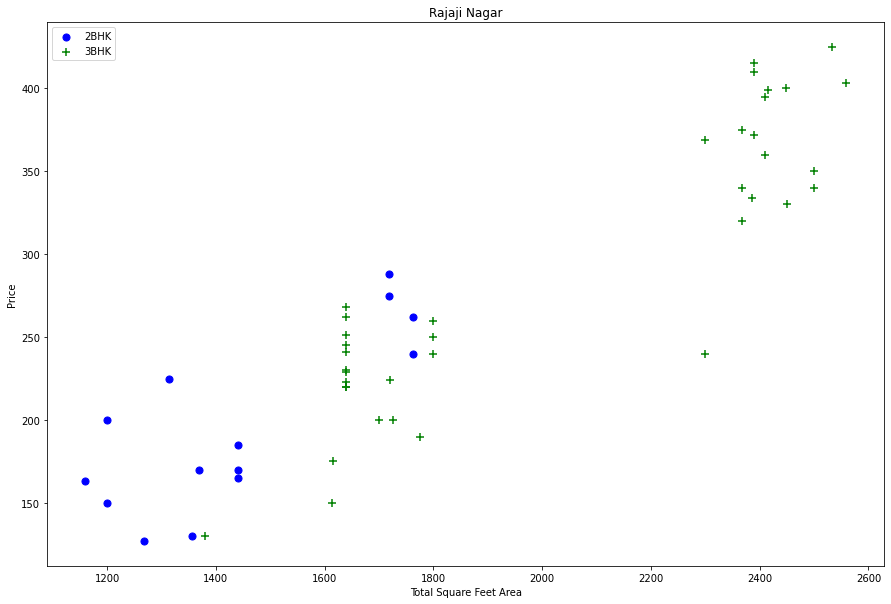

In [35]:
# plotting a scatter plot to see how the pricing outliers is doing
def plot_scatter_chart(df, location):
    bhk_2 = df[(df.location==location) & (df.BHK == 2)]
    bhk_3 = df[(df.location==location) & (df.BHK == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk_2.total_sqft, bhk_2.price, color='blue', label='2BHK', s=50)
    plt.scatter(bhk_3.total_sqft, bhk_3.price, marker='+', color='green', label='3BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7, 'Rajaji Nagar')

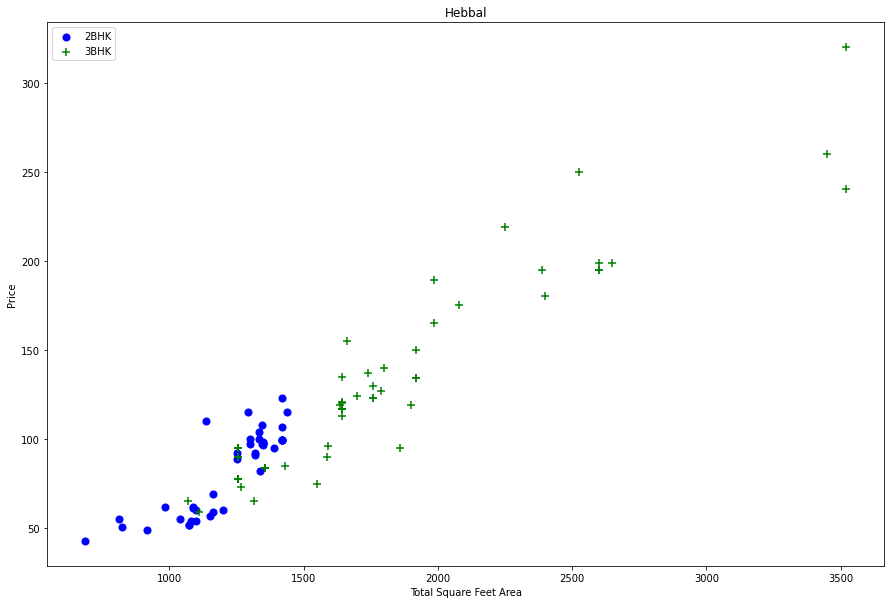

In [36]:
plot_scatter_chart(df7, 'Hebbal')

In [37]:
# OBSERVATION : THERE IS AN ODD WAY OF PRICING HERE. E.G. THE 
# 2BHK FLATS COST MORE THAN 3 BHK AND THAT TOO FOR THE SAME LOCATION
# SO THIS HAS TO BE ADDRESSED.

In [38]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

In [39]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7327, 7)

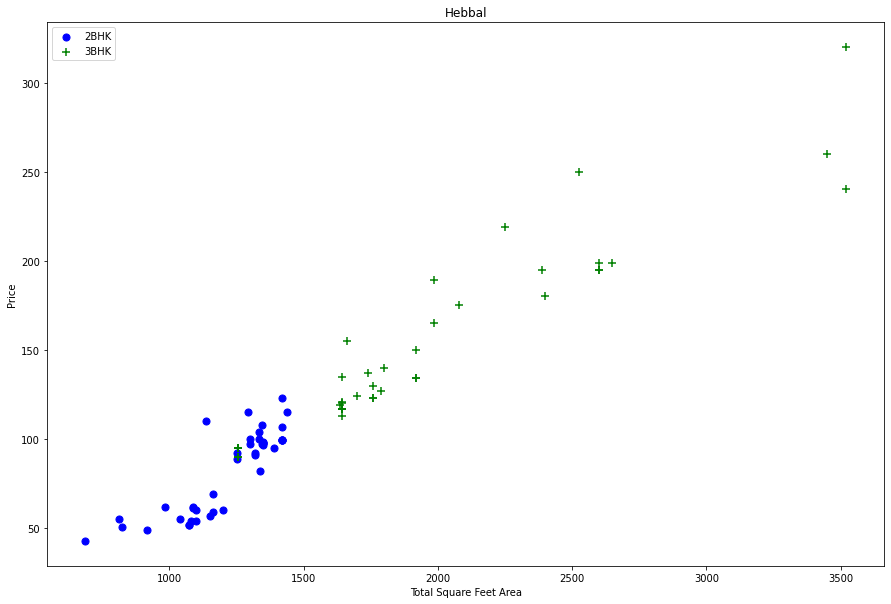

In [40]:
# the improvement 
plot_scatter_chart(df8, 'Hebbal')

Text(0, 0.5, 'Count of apartments')

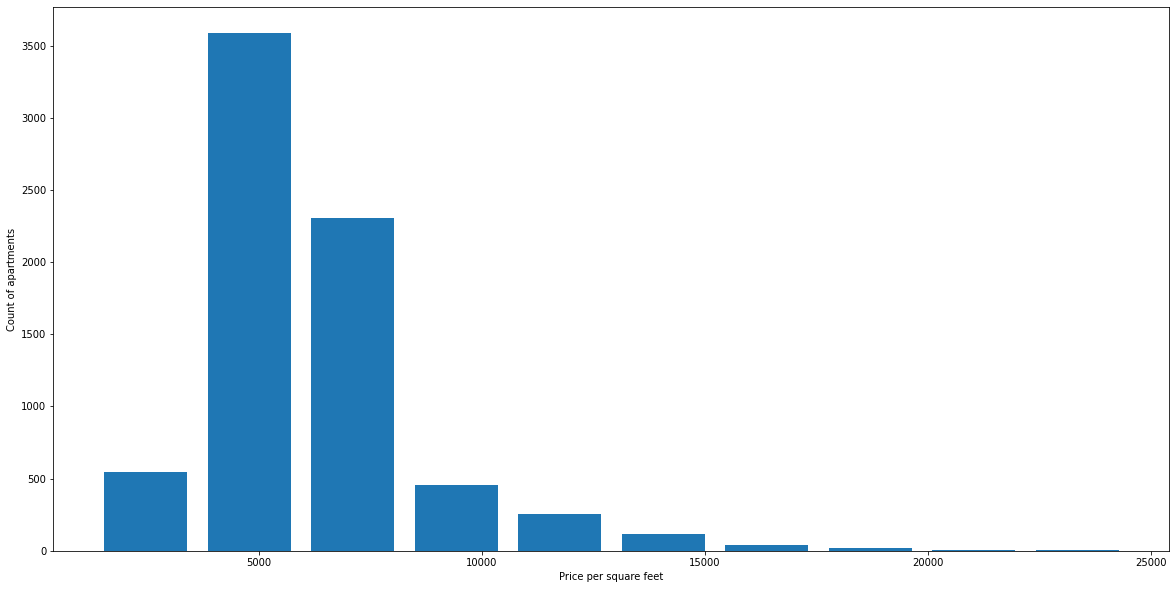

In [41]:
# how many apartments are there in per-sqft-area
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count of apartments")

In [42]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  9.,  7., 12., 16., 13.])

In [43]:
df8[df8.bath>10] 
# This is really unusual, to have 10 bathrooms ...

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5279,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8491,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8581,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9314,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9645,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count of apartments')

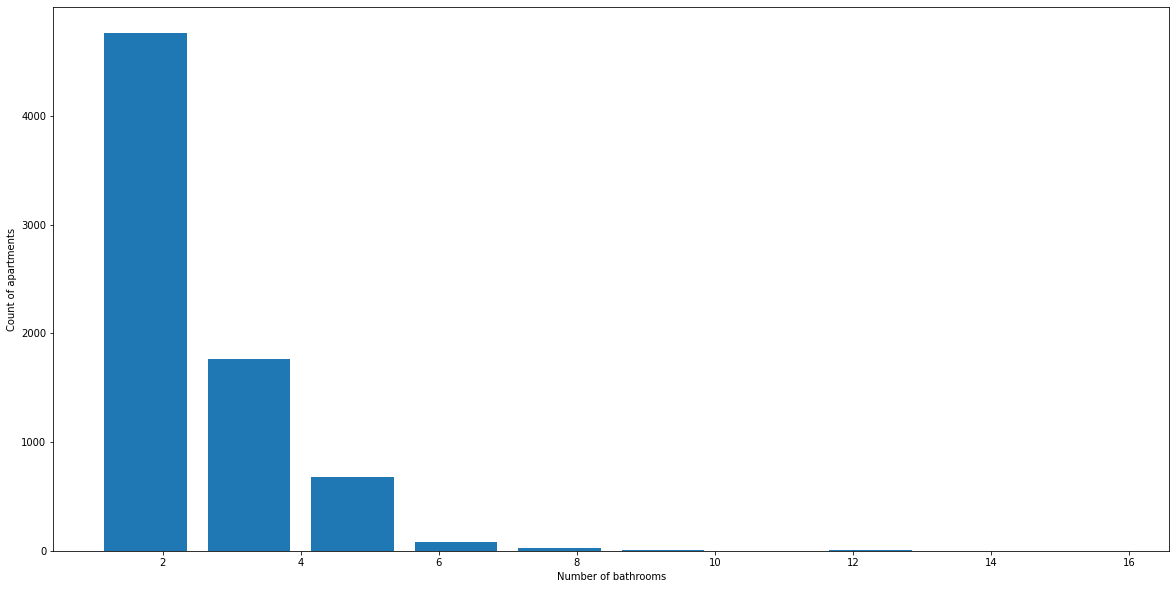

In [44]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count of apartments")

In [45]:
# Here anytime if there is a property where there is a 
# condition that number of bathrooms is 2 more than number of 
# rooms - mark these properties as an outlier
df8[df8.bath > df8.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1627,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5240,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6713,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8416,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [46]:
# Removing these properties
df9 = df8[df8.bath < df8.BHK+2]
df9.shape

(7249, 7)

In [47]:
# MODEL BUILDING HERE NOW...
# using K-SEARCH CROSS VALIDATION AND GRID SEARCH CV

In [49]:
# Hot encoding text data because ML models can't have text data
dummies = pd.get_dummies(df9.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df11 = pd.concat([df9, dummies.drop('other', axis='columns')],axis='columns')

In [55]:
df11.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
# Dropping location column as dummies are prepared
df12 = df11.drop('location', axis='columns')
df12.head()

,size,total_sqft,bath,price,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4 BHK,2850.0,4.0,428.0,4,15017.543860,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3 BHK,1630.0,3.0,194.0,3,11901.840491,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1875.0,2.0,235.0,3,12533.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3 BHK,1200.0,2.0,130.0,3,10833.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2 BHK,1235.0,2.0,148.0,2,11983.805668,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# i need independent variables only
x = df12.drop(['price','size'], axis='columns')
x.head()

,total_sqft,bath,BHK,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,15017.543860,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,11901.840491,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,12533.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,10833.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,11983.805668,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [63]:
# Now training and testing splits
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [119]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, Y_train) # Training on the given data set
lr_clf.score(X_test, Y_test) #Score of the model

0.9401769790467069

In [120]:
# That's a pretty descent score

In [121]:
# Now using K-Fold cross validation method
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #Randomizing the sample so that each of the fold has equal distribution of my datasample so that it is not targeted into one area
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.93046522, 0.9483982 , 0.91550483, 0.94469422, 0.95375507])

In [73]:
# Also trying Grid search cross validation, decision tree and lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

def find_best_model(X,Y):
    algorithms = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algorithms.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [74]:
find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.938564,{'normalize': True}
1,lasso,0.929780,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.969313,"{'criterion': 'mse', 'splitter': 'random'}"


In [100]:
# Since decision tree has the highest score, i will. use it for price prediction
# Decision tree intialization
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, Y_train)
dt.score(X_test, Y_test)

0.7656186754793898

In [122]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns==location)[0][0]
    print(loc_index)
    X = np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    if loc_index >= 0:
        X[loc_index] = 1
    
#     return dt.predict([X], check_input=True)[0]
    return lr_clf.predict([X])[0]

In [123]:
# Let's make a price prediction
predict_price('1st Phase JP Nagar', 1000, 2, 2)

5


-58.11937524163276

In [124]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)

5


-56.96599560701739

In [125]:
predict_price('Indira Nagar', 2850, 4, 4)

117


90.31016385023692

In [126]:
predict_price('Vishwapriya Layout', 1580, 3, 3)

237


13.678527216207684

In [127]:
# Exporting a model to use on a website
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [ ]:
import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open('columns.json')